# 🎬 TV Show Popularity & Recommendation System using Apriori Algorithm
---
This notebook performs **data preprocessing**, **visualization**, and builds a **TV Show Recommendation System** based on association rule mining (Apriori Algorithm).

## 🧩 Step 1: Import Required Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
import pickle


## 📂 Step 2: Load the Dataset

In [2]:

df = pd.read_csv('user_tv_show_data.csv')
df.head()


,User_ID,User_Name,User_Age,Gender,Country,TV_Show_Name,Genre,Platform,Watch_Time_Hours,Rating_Given_By_User,Watch_Frequency_Per_Week,Completion_Status,User_Satisfaction_Score
0,1122.0,Diya Reddy,38,Male,India,TVF Pitchers,Action,SonyLIV,10.1,7.7,2,Dropped,0.16
1,1102.0,Ishaan Singh,56,Male,India,Aspirants,Sci-Fi,Netflix,45.2,9.3,4,Completed,0.84
2,1069.0,Sara Patel,29,Female,India,Out of Love,Crime,MX Player,33.3,4.9,6,Dropped,0.33
3,1115.0,Krishna Singh,48,Male,India,Criminal Justice,Crime,JioCinema,48.9,4.0,3,Completed,0.39
4,1105.0,Myra Reddy,46,Female,India,Duranga,Comedy,SonyLIV,48.2,9.0,3,Ongoing,0.87


## 🔍 Step 3: Explore Dataset Structure

In [3]:

df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   1346 non-null   float64
 1   User_Name                 1346 non-null   object 
 2   User_Age                  1356 non-null   int64  
 3   Gender                    1346 non-null   object 
 4   Country                   1346 non-null   object 
 5   TV_Show_Name              1346 non-null   object 
 6   Genre                     1346 non-null   object 
 7   Platform                  1356 non-null   object 
 8   Watch_Time_Hours          1346 non-null   float64
 9   Rating_Given_By_User      1346 non-null   float64
 10  Watch_Frequency_Per_Week  1356 non-null   int64  
 11  Completion_Status         1346 non-null   object 
 12  User_Satisfaction_Score   1346 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 137.8+ KB


,User_ID,User_Name,User_Age,Gender,Country,TV_Show_Name,Genre,Platform,Watch_Time_Hours,Rating_Given_By_User,Watch_Frequency_Per_Week,Completion_Status,User_Satisfaction_Score
count,1346.000000,1346,1356.000000,1346,1346,1346,1346,1356,1346.000000,1346.000000,1356.000000,1346,1346.000000
unique,NaN,200,NaN,2,1,40,7,7,NaN,NaN,NaN,3,NaN
top,NaN,Myra Verma,NaN,Female,India,Delhi Crime,Romance,Amazon Prime,NaN,NaN,NaN,Completed,NaN
freq,NaN,14,NaN,710,1346,47,201,214,NaN,NaN,NaN,485,NaN
mean,1098.566122,NaN,37.883481,NaN,NaN,NaN,NaN,NaN,25.849703,7.007429,4.069322,NaN,0.361530
std,58.177313,NaN,12.724779,NaN,NaN,NaN,NaN,NaN,13.950186,1.719723,1.966788,NaN,0.219872
min,1000.000000,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,2.000000,4.000000,1.000000,NaN,0.020000
25%,1048.000000,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,13.600000,5.500000,2.000000,NaN,0.180000
50%,1097.000000,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,25.400000,6.950000,4.000000,NaN,0.340000
75%,1148.750000,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,37.800000,8.500000,6.000000,NaN,0.500000


## 🧹 Step 4: Data Cleaning — Handle Missing Values & Duplicates

In [4]:

# Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'O':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 User_ID                     10
User_Name                   10
User_Age                     0
Gender                      10
Country                     10
TV_Show_Name                10
Genre                       10
Platform                     0
Watch_Time_Hours            10
Rating_Given_By_User        10
Watch_Frequency_Per_Week     0
Completion_Status           10
User_Satisfaction_Score     10
dtype: int64

Missing values after cleaning:
 User_ID                     0
User_Name                   0
User_Age                    0
Gender                      0
Country                     0
TV_Show_Name                0
Genre                       0
Platform                    0
Watch_Time_Hours            0
Rating_Given_By_User        0
Watch_Frequency_Per_Week    0
Completion_Status           0
User_Satisfaction_Score     0
dtype: int64


C:\Users\sarik\AppData\Local\Temp\ipykernel_17884\1039773937.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\sarik\AppData\Local\Temp\ipykernel_17884\1039773937.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [5]:
df.to_csv("user_tv_show_data_cleaned.csv", index=False)

## ⚖️ Step 5: Normalization & Scaling

In [6]:

numeric_cols = ['User_Age', 'Watch_Time_Hours', 'Rating_Given_By_User',
                'Watch_Frequency_Per_Week', 'User_Satisfaction_Score']

# Normalization (0-1)
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())

# Scaling using MinMax
minmax = MinMaxScaler()
scaled_minmax = pd.DataFrame(minmax.fit_transform(df[numeric_cols]), columns=numeric_cols)

scaled_minmax.head()


,User_Age,Watch_Time_Hours,Rating_Given_By_User,Watch_Frequency_Per_Week,User_Satisfaction_Score
0,0.500000,0.168750,0.616667,0.166667,0.144330
1,0.909091,0.900000,0.883333,0.500000,0.845361
2,0.295455,0.652083,0.150000,0.833333,0.319588
3,0.727273,0.977083,0.000000,0.333333,0.381443
4,0.681818,0.962500,0.833333,0.333333,0.876289


## 📊 Step 6: Central Tendency & Dispersion of Data

In [7]:

print("Mean Values:\n", df[numeric_cols].mean())
print("\nMedian Values:\n", df[numeric_cols].median())
print("\nMode Values:\n", df[numeric_cols].mode().iloc[0])
print("\nStandard Deviation:\n", df[numeric_cols].std())
print("\nVariance:\n", df[numeric_cols].var())


Mean Values:
 User_Age                    0.497391
Watch_Time_Hours            0.497627
Rating_Given_By_User        0.500995
Watch_Frequency_Per_Week    0.510617
User_Satisfaction_Score     0.352670
dtype: float64

Median Values:
 User_Age                    0.500000
Watch_Time_Hours            0.492708
Rating_Given_By_User        0.500000
Watch_Frequency_Per_Week    0.500000
User_Satisfaction_Score     0.329897
dtype: float64

Mode Values:
 User_Age                    0.159091
Watch_Time_Hours            0.497627
Rating_Given_By_User        0.433333
Watch_Frequency_Per_Week    0.666667
User_Satisfaction_Score     0.061856
Name: 0, dtype: float64

Standard Deviation:
 User_Age                    0.289252
Watch_Time_Hours            0.289722
Rating_Given_By_User        0.285717
Watch_Frequency_Per_Week    0.327806
User_Satisfaction_Score     0.226070
dtype: float64

Variance:
 User_Age                    0.083667
Watch_Time_Hours            0.083939
Rating_Given_By_User        0.081634


## 🎨 Step 7: Data Visualizations for Analysis

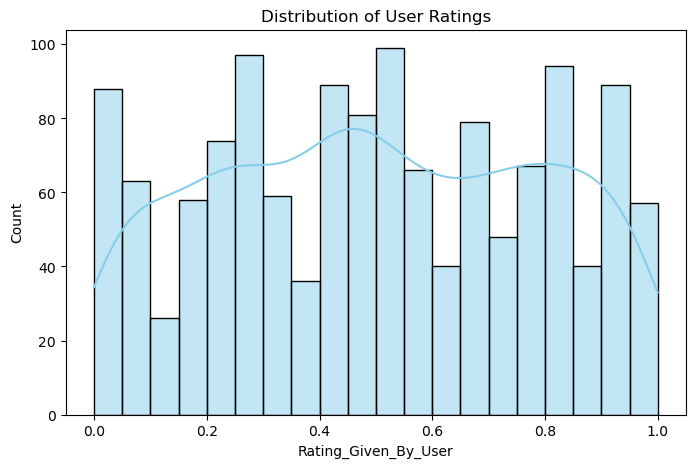

C:\Users\sarik\AppData\Local\Temp\ipykernel_17884\4227619093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index, palette='Set2')


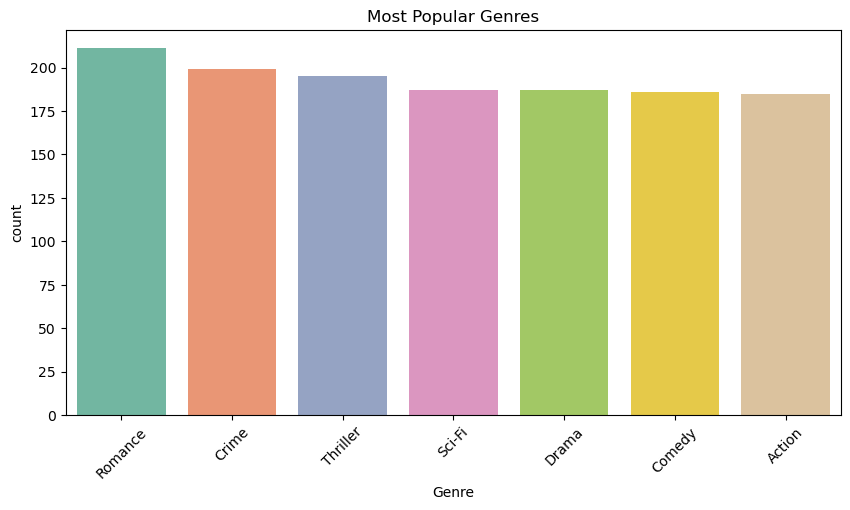

C:\Users\sarik\AppData\Local\Temp\ipykernel_17884\4227619093.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Genre', y='User_Satisfaction_Score', data=df, estimator='mean', ci=None, palette='viridis')
C:\Users\sarik\AppData\Local\Temp\ipykernel_17884\4227619093.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='User_Satisfaction_Score', data=df, estimator='mean', ci=None, palette='viridis')


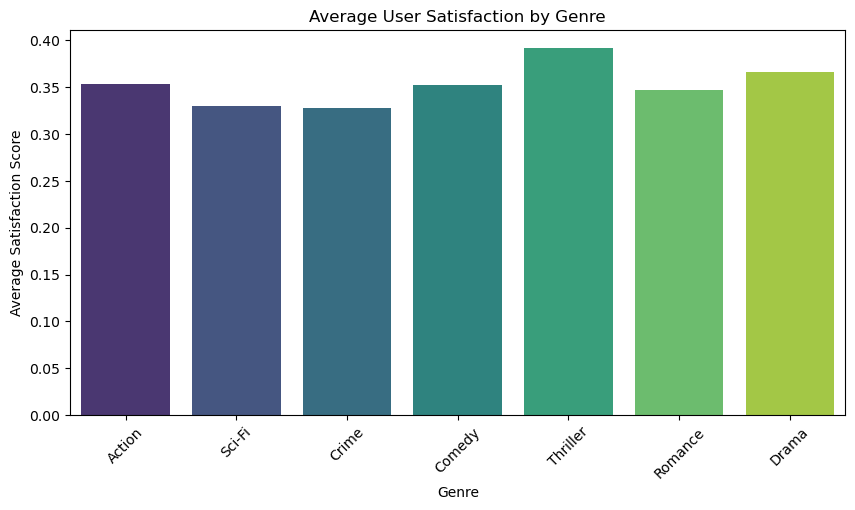

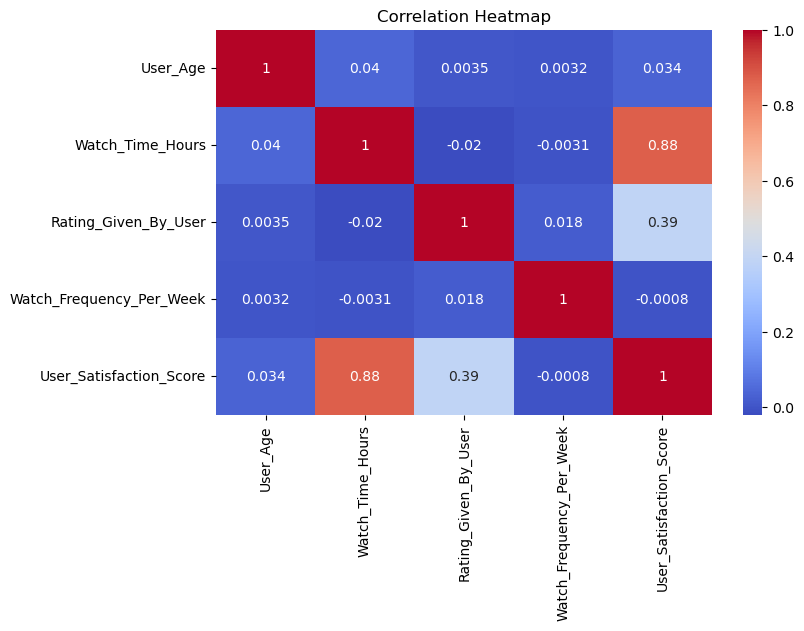

In [8]:

plt.figure(figsize=(8,5))
sns.histplot(df['Rating_Given_By_User'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of User Ratings')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index, palette='Set2')
plt.title('Most Popular Genres')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y='User_Satisfaction_Score', data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Average User Satisfaction by Genre')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8,5))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 🧠 Step 8: Prepare Data for Apriori Algorithm

In [9]:

# Create a User-Show matrix
user_show_matrix = pd.crosstab(df['User_ID'], df['TV_Show_Name'])
user_show_matrix = user_show_matrix.applymap(lambda x: 1 if x > 0 else 0)
# Display a sample
user_show_matrix.head()


C:\Users\sarik\AppData\Local\Temp\ipykernel_17884\4058909669.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  user_show_matrix = user_show_matrix.applymap(lambda x: 1 if x > 0 else 0)


TV_Show_Name,Arya,Aspirants,Asur,Bandish Bandits,Bard of Blood,Bombay Begums,Breathe,Candy,Class,Criminal Justice,...,Scam 1992,Special OPS,Suzhal,TVF Pitchers,Taaza Khabar,Taj Mahal 1989,The Family Man,The Freelancer,The Night Manager,Undekhi
User_ID,,,,,,,,,,,,,,,,,,,,,
1000.0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,0
1001.0,1,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,1,0
1002.0,1,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,1,0,1,0
1003.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1004.0,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## 🤖 Step 9: Apply Apriori Algorithm for Recommendations

In [10]:

# Apply Apriori
frequent_itemsets = apriori(user_show_matrix, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules = rules.sort_values('confidence', ascending=False)

rules.head(10)


C:\Users\sarik\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
21,(The Night Manager),(Delhi Crime),0.154229,0.258706,0.069652,0.451613,1.745658,1.0,0.029752,1.351771,0.505042,0.202899,0.260229,0.360422
7,(Bandish Bandits),(Delhi Crime),0.149254,0.258706,0.059701,0.400000,1.546154,1.0,0.021089,1.235489,0.415205,0.171429,0.190604,0.315385
26,(Scam 1992),(Special OPS),0.139303,0.203980,0.054726,0.392857,1.925958,1.0,0.026311,1.311092,0.558592,0.189655,0.237277,0.330575
28,(TVF Pitchers),(The Family Man),0.159204,0.184080,0.059701,0.375000,2.037162,1.0,0.030395,1.305473,0.605523,0.210526,0.233994,0.349662
13,(Candy),(Panchayat),0.149254,0.179104,0.054726,0.366667,2.047222,1.0,0.027994,1.296151,0.601276,0.200000,0.228485,0.336111
9,(Candy),(Breathe),0.149254,0.199005,0.054726,0.366667,1.842500,1.0,0.025024,1.264729,0.537480,0.186441,0.209317,0.320833
23,(Farzi),(Panchayat),0.164179,0.179104,0.059701,0.363636,2.030303,1.0,0.030296,1.289979,0.607143,0.210526,0.224793,0.348485
17,(Kota Factory),(Delhi Crime),0.194030,0.258706,0.069652,0.358974,1.387574,1.0,0.019455,1.156418,0.346561,0.181818,0.135261,0.314103
1,(Arya),(Delhi Crime),0.154229,0.258706,0.054726,0.354839,1.371588,1.0,0.014826,1.149005,0.320321,0.152778,0.129682,0.283189
22,(Panchayat),(Farzi),0.179104,0.164179,0.059701,0.333333,2.030303,1.0,0.030296,1.253731,0.618182,0.210526,0.202381,0.348485


In [11]:
rules.to_csv("apriori_rules_tv_shows.csv", index=False)

## 💡 Step 10: Recommend Shows Based on Association Rules

In [12]:

def recommend_show(show_name):
    recs = rules[rules['antecedents'].apply(lambda x: show_name in list(x))]
    if recs.empty:
        return f"No strong associations found for '{show_name}'."
    recommendations = set()
    for consequents in recs['consequents']:
        recommendations.update(consequents)
    return recommendations

# Example
recommend_show('Panchayat')


{'Candy', 'Farzi'}

In [17]:
features = ['Watch_Time_Hours', 'User_Satisfaction_Score']
x = df[features]

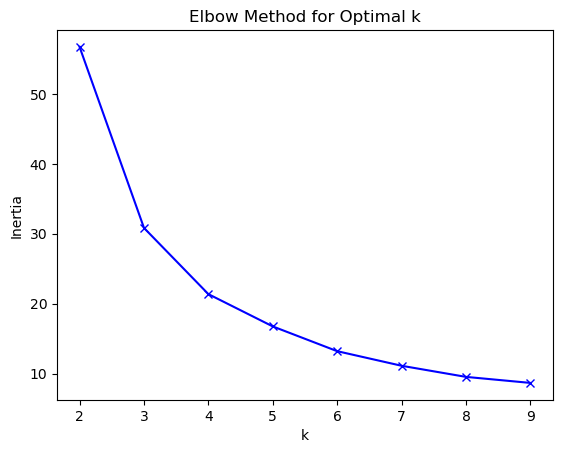

In [18]:
# Using Elbow Method to find optimal clusters

inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [19]:
km = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = km.fit_predict(x)

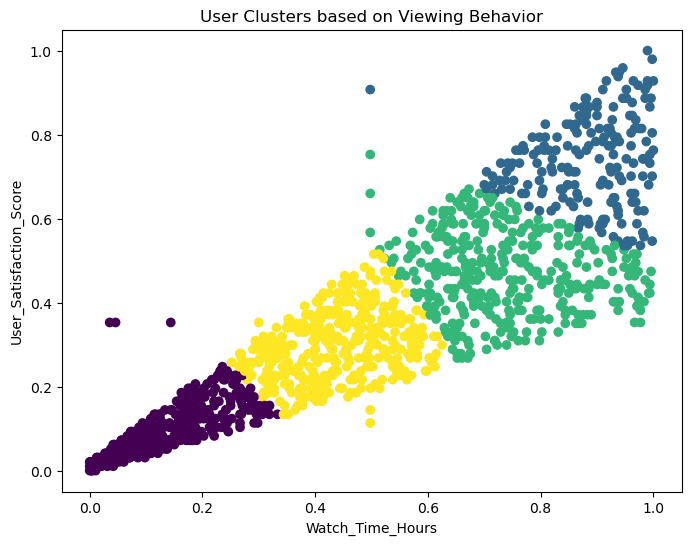

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df['Watch_Time_Hours'], df['User_Satisfaction_Score'], 
            c=df['Cluster'])
plt.xlabel('Watch_Time_Hours')
plt.ylabel('User_Satisfaction_Score')
plt.title('User Clusters based on Viewing Behavior')
plt.show()

In [22]:
df.to_csv('tv_show_clustered_data.csv', index=False)

## 💾 Step 11: Save the Model as Pickle File

In [ ]:

with open('tv_show_apriori_model.pkl', 'wb') as f:
    pickle.dump(rules, f)
print("Model saved successfully as 'tv_show_apriori_model.pkl'")


## 🏁 Step 12: Conclusion
- Cleaned and preprocessed the dataset
- Normalized and scaled numerical data
- Analyzed user behavior and satisfaction
- Generated insights through visualizations
- Applied **Apriori Algorithm** for TV show recommendations
- Exported model as a pickle file for web integration